In [1]:
import torch
import torch.nn as nn

from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

import matplotlib.pyplot as plt
import numpy as np

## 생성자

In [2]:
latent_dim = 100

# 생성자 클래스
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        # 하나의 블록 정의
        def block(input_dim, output_dim, normalize=True):
            layers = [nn.Linear(input_dim, output_dim)] # Linear 레이어
            
            if normalize: # 배치정규화 수행
                layers.append(nn.BatchNorm1d(output_dim, 0.8))
            
            layers.append(nn.LeakyReLU(0.2, inplace=True)) # activation function

            return layers
          
        # 위에서 정의한 블록(레이어)를 여러개 쌓을 것임
        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False),
            *block(128,256),
            *block(256,512),
            *block(512,1024),
            nn.Linear(1024, 1*28*28), # 하나의 MNINST 데이터를 생성
            nn.Tanh() # -1 ~ 1 사이의 값을 갖게 한다
        )


    def forward(self, z):
      img = self.model(z)
      img = img.view(img.size(0), 1, 28, 28) # 이미지 생성
      return img

## 판별자

In [3]:
# 판별자(Discriminator) 클래스 정의
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # 
        self.model = nn.Sequential(
            nn.Linear(1 * 28 * 28, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid(),  # 확률 값을 내보냄
        )

    def forward(self, img):
      flattened = img.view(img.size(0), -1) # 한장의 이미지가 들어오면 flat함
      output = self.model(flattened)

      return output

## 학습 데이터셋
- MNIST 사용

In [4]:
transforms_train = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
# 학습 데이터셋
train_dataset = datasets.MNIST(root="./dataset", train=True, download=True, transform=transforms_train)
# 배치 128개, 데이터 로어
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [5]:
# 생성자와 판별자 초기화
# 파라미터 설정

generator = Generator()
discriminator = Discriminator()

generator.cuda()
discriminator.cuda()

# loss function
adversarial_loss = nn.BCELoss()
adversarial_loss.cuda()

# learning rate
lr = 0.0002

# 생성자와 판별자 optimizer
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[Epoch 0/50] [D loss: 0.410146] [G loss: 0.778165]
[Epoch 1/50] [D loss: 0.134580] [G loss: 2.179240]
[Epoch 2/50] [D loss: 0.225163] [G loss: 2.136491]
[Epoch 3/50] [D loss: 0.196298] [G loss: 1.745077]
[Epoch 4/50] [D loss: 0.169888] [G loss: 3.287423]
[Epoch 5/50] [D loss: 0.275531] [G loss: 2.665726]
[Epoch 6/50] [D loss: 0.303322] [G loss: 1.441792]
[Epoch 7/50] [D loss: 0.246384] [G loss: 3.484176]
[Epoch 8/50] [D loss: 0.252512] [G loss: 1.413143]
[Epoch 9/50] [D loss: 0.107737] [G loss: 3.234012]
[Epoch 10/50] [D loss: 0.160711] [G loss: 2.454637]
[Epoch 11/50] [D loss: 0.155579] [G loss: 3.364935]
[Epoch 12/50] [D loss: 0.212262] [G loss: 5.540832]
[Epoch 13/50] [D loss: 0.178068] [G loss: 3.330014]
[Epoch 14/50] [D loss: 0.150075] [G loss: 2.649319]
[Epoch 15/50] [D loss: 0.103568] [G loss: 2.973999]
[Epoch 16/50] [D loss: 0.142730] [G loss: 3.564403]
[Epoch 17/50] [D loss: 0.211018] [G loss: 1.690087]
[Epoch 18/50] [D loss: 0.254070] [G loss: 1.668048]
[Epoch 19/50] [D loss:

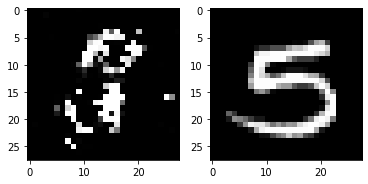

[Epoch 40/50] [D loss: 0.176296] [G loss: 4.746065]
torch.Size([1, 28, 28])
torch.Size([128, 1, 28, 28])


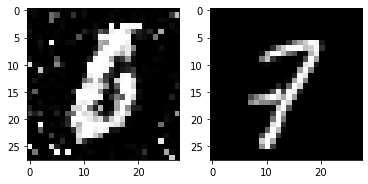

[Epoch 41/50] [D loss: 1.750502] [G loss: 12.828581]
torch.Size([1, 28, 28])
torch.Size([128, 1, 28, 28])


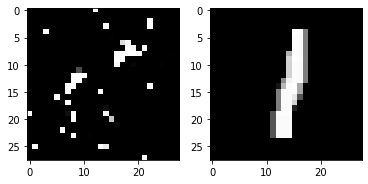

[Epoch 42/50] [D loss: 0.202575] [G loss: 1.921681]
torch.Size([1, 28, 28])
torch.Size([128, 1, 28, 28])


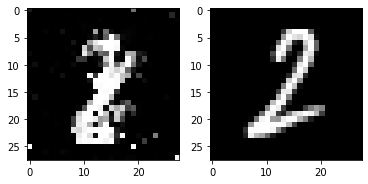

[Epoch 43/50] [D loss: 0.136418] [G loss: 3.080976]
torch.Size([1, 28, 28])
torch.Size([128, 1, 28, 28])


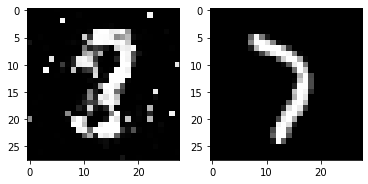

[Epoch 44/50] [D loss: 0.185138] [G loss: 6.058261]
torch.Size([1, 28, 28])
torch.Size([128, 1, 28, 28])


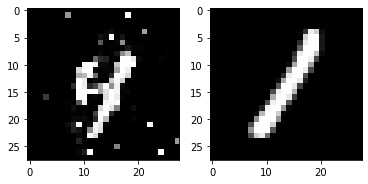

[Epoch 45/50] [D loss: 0.231845] [G loss: 1.514386]
torch.Size([1, 28, 28])
torch.Size([128, 1, 28, 28])


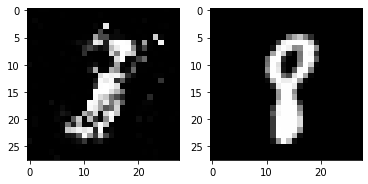

[Epoch 46/50] [D loss: 0.187867] [G loss: 2.358241]
torch.Size([1, 28, 28])
torch.Size([128, 1, 28, 28])


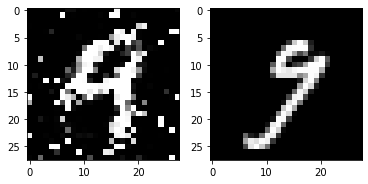

[Epoch 47/50] [D loss: 0.172742] [G loss: 1.983443]
torch.Size([1, 28, 28])
torch.Size([128, 1, 28, 28])


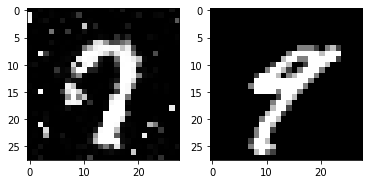

[Epoch 48/50] [D loss: 0.170621] [G loss: 2.996931]
torch.Size([1, 28, 28])
torch.Size([128, 1, 28, 28])


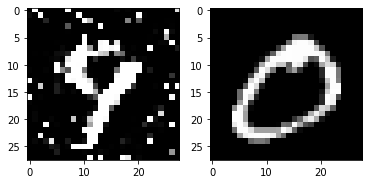

[Epoch 49/50] [D loss: 0.157960] [G loss: 3.211366]


In [28]:
n_epochs = 50

# 학습
for epoch in range(n_epochs):
  for i, (imgs,_) in enumerate(dataloader): # label은 필요 없음
    
    # 진짜와 가짜 이미지에 대한 정답 레이블
    real = torch.cuda.FloatTensor(imgs.size(0), 1).fill_(1.0) # 진짜: 1
    fake = torch.cuda.FloatTensor(imgs.size(0), 1).fill_(0.0) # 가짜: 0

    real_imgs = imgs.cuda()  # 이미지 데이터

    """생성자 generator 학습 시작"""
    # 랜덤 노이즈(noise) 샘플링
    # 생정자는 노이즈를 받아서 랜덤 이미지를 생성할 수 있다.
    # 이미지 개수만큼 노이즈를 뽑아서, 생성자에 넣고 이미지를 만든다.
    # 그래서 자신이 만든 이미지를, real_imgs가 되는 방향으로 학습을 한다.

    optimizer_G.zero_grad()
    
    # 노이즈 샘플링, 정규분포에서 샘플링을 함
    z = torch.normal(mean=0, std=1, size=(imgs.shape[0], latent_dim)).cuda() 
    generated_imgs = generator(z) # 이미지 생성

    # generated_imgs의 차원:  torch.Size([128, 1, 28, 28])


    # loss 계산하고 업데이트
    g_loss = adversarial_loss(discriminator(generated_imgs), real)
    g_loss.backward()
    optimizer_G.step()


    """판별자 discriminator 학습 시작"""
    # 판별자는 실제 이미지는 real로 분류하고
    # 판별자는 생성자가 만든 이미지에 대해서는 fake로 분류하는 방향으로 학습을 함.
    
    optimizer_D.zero_grad()

    # loss 계산하고 업데이트 -> loss 값 2개가 있다.
    real_loss = adversarial_loss(discriminator(real_imgs), real)
    fake_loss = adversarial_loss(discriminator(generated_imgs.detach()), fake)
    d_loss = (real_loss + fake_loss) / 2

    d_loss.backward()
    optimizer_D.step()

    """학습 전부 완료"""

    if epoch>=40 and i == 100:
      sample_img = generated_imgs[0]
      print(sample_img.shape)
      sample_img = sample_img.detach().cpu().numpy()
      sample_img = np.squeeze(sample_img[0])
      plt.subplot(121)
      plt.imshow(sample_img, 'gray')

      sample_img = real_imgs
      print(sample_img.shape)
      sample_img = sample_img.detach().cpu().numpy()
      sample_img = np.squeeze(sample_img[0])
      plt.subplot(122)
      plt.imshow(sample_img, 'gray')
      plt.show()

  print(f"[Epoch {epoch}/{n_epochs}] [D loss: {d_loss.item():.6f}] [G loss: {g_loss.item():.6f}]")